# Esercitazione 11

**6 Maggio 2025**

*Gradiente e gradiente coniugato*

In [2]:
import numpy as np
import scipy as sp
import sympy as sym
import matplotlib.pyplot as plt

## Esercizio 1
Implementare la funzione **steepestdescent(A,b,x0,itmax,tol)** che implementa il metodo di discesa più ripida del gradiente per risolvere il sistema lineare Ax=b, con A matrice simmetrica e definita positiva. La funzione prende in input:
- A: matrice dei coefficienti
- b: termine noto
- x0: vettore iniziale della stessa dimensione di b
- itmax: iterazioni massime oltre le quali il metodo si ferma
- toll: tolleranza per il criterio di arresto

e restituisce in output:
- il vettore soluzione
- un vettore di tante componenti quanto il numero di iterazioni effettuate, contenente $ \frac{||r^{(k)}||_2} {||b||_2}$ iterazione per iterazione

- un array contenente le soluzioni ad ogni iterazione
- il numero di iterazioni impiegate per calcolare la soluzione con la tolleranza richiesta

Usare come criterio di arresto $ \frac{||r^{(k)}||_2} {||b||_2} < toll$

[0.99978915 1.00094363 1.0019275  0.99771116 0.99606725 0.99681985
 0.99867383 1.00069338 1.00238844 1.00356889 1.00421261 1.00437942
 1.00416138 1.0036561  1.00295372 1.00213149 1.00125234 1.00036555
 0.99950828 0.99870743 0.99798148 0.99734214 0.99679577 0.99634468
 0.99598807 0.99572286 0.99554437 0.99544682 0.99542375 0.99546829
 0.99557347 0.99573233 0.99593811 0.9961843  0.99646473 0.99677362
 0.99710557 0.99745559 0.99781913 0.99819202 0.99857049 0.99895115
 0.99933097 0.99970726 1.00007763 1.00044001 1.00079257 1.00113376
 1.00146226 1.00177694 1.00207689 1.00236135 1.00262975 1.00288163
 1.00311668 1.00333472 1.00353563 1.00371943 1.00388619 1.00403606
 1.00416928 1.0042861  1.00438684 1.00447189 1.00454162 1.00459647
 1.0046369  1.00466337 1.00467638 1.00467643 1.00466404 1.00463972
 1.00460399 1.00455738 1.00450041 1.0044336  1.00435747 1.00427254
 1.00417929 1.00407824 1.00396987 1.00385465 1.00373306 1.00360555
 1.00347256 1.00333453 1.00319188 1.00304501 1.00289433 1.0027

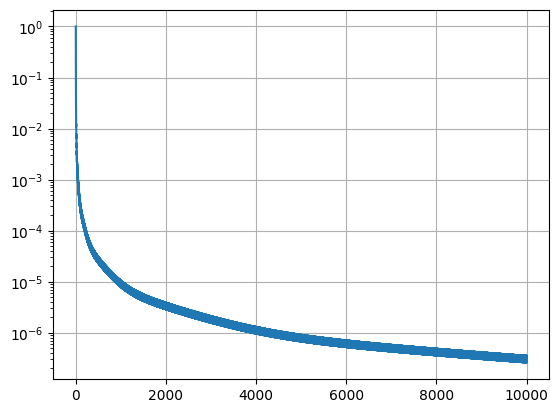

In [3]:
def steepest_descent(A, b, x0, maxit, toll):
    m, n = A.shape
    if m != n:
        print("Matrice non quadrata!")
        return None, None, None, None
    x_curr = x0
    attempts = []
    errors = []
    stop = False

    while not stop:
        # Vettore residuo — gradiente
        r_k = A @ x_curr - b
        # Direzione opposta del gradiente
        p_k = -r_k
        # Step size
        alpha_k = (r_k @ r_k) / ((A @ r_k) @ r_k)
        # Aggiorno l'iterato
        x_curr += alpha_k * p_k
        attempts.append(x_curr)
        error = np.linalg.norm(r_k) / np.linalg.norm(b)
        errors.append(error)
        if error < toll or len(attempts) > maxit:
            stop = True
    
    return x_curr, errors, attempts, len(attempts)

n = 500
A = sp.linalg.hilbert(n)
b = np.sum(A, axis=1)
x0 = np.zeros(A.shape[0])
toll = np.spacing(1)
maxit = 10_000

# Expected result: np.ones(b.shape)
res, errors, attempts, nr_attempts = steepest_descent(A, b, x0, maxit, toll)
print(res)
print(nr_attempts)
plt.grid(True)
plt.semilogy(range(len(errors)), errors)
plt.show()

## Esercizio 1-Bis
Implementare la funzione **steepestdescent_CL(A,b,x0,itmax,X,Y,Z,f,tol)** da utilizzare solo nel caso n=2 che visualizza anche le curve di livello e l'iterato x_k.

N.B: f(x) è il funzionale quadratico da minimizzare (f(x)= <Ax,x>-<b,x>) ,
X,Y sono la discretizzazione del piano su cui costruire Z (ottenuta valutando f sui punti della griglia)

## Esercizio 2
Implementare la funzione **conjugate_gradient(A,b,x0,itmax,tol)** che implementa il metodo del gradiente coniugato per risolvere il sistema lineare Ax=b, con A matrice simmetrica e definita positiva. La funzione prende in input:
- A: matrice dei coefficienti
- b: termine noto
- x0: vettore iniziale della stessa dimensione di b
- itmax: iterazioni massime oltre le quali il metodo si ferma
- toll: tolleranza per il criterio di arresto

e restituisce in output:
- il vettore soluzione
- un vettore di tante componenti quanto il numero di iterazioni effettuate, contenente $ \frac{||r^{(k)}||_2} {||b||_2}$ iterazione per iterazione
- un array contenente le soluzioni ad ogni iterazione
- il numero di iterazioni impiegate per calcolare la soluzione con la tolleranza richiesta

Usare come criterio di arresto $ \frac{||r^{(k)}||_2} {||b||_2} < toll$

[0.99998779 1.00029292 0.99854939 1.00173911 1.00092377 0.99945879
 0.99877214 0.99887166 0.99938986 1.00000111 1.00051183 1.00084102
 1.0009795  1.00095557 1.00081217 1.0005935  1.00033841 1.00007773
 0.99983396 0.99962204 0.99945063 0.99932348 0.99924072 0.99919992
 0.99919697 0.99922684 0.99928401 0.99936293 0.99945826 0.99956502
 0.99967872 0.99979543 0.99991175 1.00002486 1.00013243 1.00023264
 1.0003241  1.00040579 1.00047705 1.00053753 1.00058711 1.00062588
 1.00065412 1.00067223 1.00068073 1.00068023 1.00067138 1.00065489
 1.00063148 1.0006019  1.00056687 1.00052712 1.00048335 1.00043625
 1.00038645 1.00033458 1.0002812  1.00022686 1.00017205 1.00011724
 1.00006284 1.00000924 0.99995677 0.99990574 0.99985643 0.99980906
 0.99976385 0.99972096 0.99968055 0.99964273 0.9996076  0.99957522
 0.99954564 0.99951891 0.99949502 0.99947398 0.99945576 0.99944034
 0.99942767 0.99941769 0.99941034 0.99940555 0.99940324 0.99940332
 0.9994057  0.99941029 0.99941699 0.99942569 0.99943629 0.9994

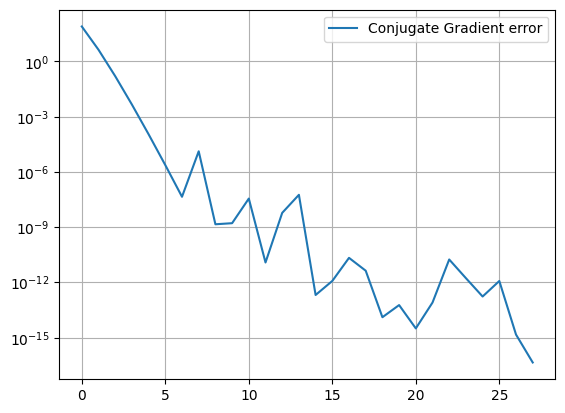

In [12]:
def conjugate_gradient(A, b, x0, itmax, toll):
    m, n = A.shape
    if m != n:
        print("A non quadrata!")
        return None, None, None, None
    attempts = []
    errors = []
    x_curr = x0
    r_next, r_curr = None, A @ x_curr - b
    p_next, p_curr = None, -r_curr
    stop = False
    
    while not stop:
        step_size = (r_curr @ r_curr) / ((A @ p_curr) @ p_curr)
        x_curr += step_size * p_curr
        attempts.append(x_curr)
        
        r_next = A @ x_curr - b
        lambda_k = (r_next @ r_next) / (r_curr @ r_curr)
        p_next = -r_next + lambda_k * p_curr 
        
        error = np.linalg.norm(r_next) ** 2
        errors.append(error)
        
        if error < toll or len(attempts) > itmax:
            stop = True
        else:
            p_curr = p_next
            r_curr = r_next

    return x_curr, errors, attempts, len(attempts)

n = 500
A = sp.linalg.hilbert(n)
b = np.sum(A, axis=1)
x0 = np.zeros(A.shape[0])
toll = np.spacing(1)
maxit = 10_000

# Expected result: np.ones(b.shape)
res, errors, attempts, nr_attempts = conjugate_gradient(A, b, x0, maxit, toll)
print(res)
print(nr_attempts)
plt.grid(True)
plt.semilogy(range(len(errors)), errors)
plt.legend(["Conjugate Gradient error"])
plt.show()

## Esercizio 2-Bis
Implementare la funzione **conjugate_gradient_CL(A,b,x0,itmax,X,Y,Z,f,tol)** da utilizzare solo nel caso n=2 che visualizza anche le curve di livello e l'iterato x_k

## Test didattici per il caso n=2, visualizzando le curve di livello

Risolvere il sistema lineare Ax=b, dove A=np.array([[8,4],[4,3]]) e b=np.array([8,10]), utilizzando
il metodo del gradiente e del gradiente coniugato con la visualizzazione grafica delle curve di livello e della soluzione ad ogni iterazione. Si selezioni l'iterato iniziale x0=[0,0], itmax=200
tol=1e-10. Si confrontino le iterazioni effettuate da ciascuno dei due metodi e si visualizzi l'errore ad ogni iterazione.

A=np.array([[8,4],[4,3]]) 
b=np.array([[8],[10]])
x=np.linspace(-7,3,100)
y=np.linspace(-5,14,100)
 
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
for i in range(len(y)):
    for j in range(len(x)):
        x_coor = X[i][j]
        y_coor = Y[i][j]
        Z[i][j] = f(np.array([[x_coor], [y_coor]]),A,b)
 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotta la superficie
ax.plot_surface(X, Y, Z, cmap=plt.cm.viridis)

# Mostra il grafico
plt.show() 


print("Soluzione sistema ", x_G_0)
print("Numero di iterati ", itG_0)
# Visualizzazione grafica 3D
# Creazione della griglia per la superficie
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot della superficie

surf = ax.plot_surface(X, Y, Z, cmap='Blues', alpha=0.6, rstride=1, cstride=1, linewidth=0)

# Calcolo di z_iterates
z_iterates = np.array([f(vec_sol_G[i, :].reshape(2, 1), A, b) for i in range(vec_sol_G.shape[0])])

# Plot del percorso degli iterati
ax.plot(vec_sol_G[:, 0], vec_sol_G[:, 1], z_iterates.flatten(), color='red', linewidth=2, label='Percorso a zig-zag')
ax.scatter(vec_sol_G[:5, 0], vec_sol_G[:5, 1], z_iterates[:5].flatten(), color='red', s=80, label='Iterati')

# Punto iniziale e minimo

ax.scatter([x0[0, 0]], [x0[1, 0]], [f(x0, A, b)], color='blue', s=200, marker='o', label='Punto iniziale')
ax.scatter([x_G_0[0, 0]], [x_G_0[1, 0]], f(x_G_0,A,b), color='green', s=200, marker='*', label='Minimo trovato')

# Personalizzazione
ax.set_title(f'Metodo del Gradiente per f(x) = 0.5*x^T A x - b^T x')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.legend()
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, label='f(x, y)')
plt.show()
print("cond A",np.linalg.norm(A))

# Plot della superficie

surf = ax.plot_surface(X, Y, Z, cmap='Blues', alpha=0.6, rstride=1, cstride=1, linewidth=0)

# Calcolo di z_iterates
z_iterates = np.array([f(vec_sol_G[i, :].reshape(2, 1), A, b) for i in range(vec_sol_G.shape[0])])

# Plot del percorso degli iterati
ax.plot(vec_sol_G[:, 0], vec_sol_G[:, 1], z_iterates.flatten(), color='red', linewidth=2, label='Percorso a zig-zag')
ax.scatter(vec_sol_G[:5, 0], vec_sol_G[:5, 1], z_iterates[:5].flatten(), color='red', s=80, label='Iterati')

# Punto iniziale e minimo

ax.scatter([x0[0, 0]], [x0[1, 0]], [f(x0, A, b)], color='blue', s=200, marker='o', label='Punto iniziale')
ax.scatter([x_cg_0[0, 0]], [x_cg_0[1, 0]], f(x_cg_0,A,b), color='green', s=200, marker='*', label='Minimo trovato')

# Personalizzazione
ax.set_title(f'Metodo del Gradiente per f(x) = 0.5*x^T A x - b^T x')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.legend()
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, label='f(x, y)')
plt.show()
print("cond A",np.linalg.norm(A))

## Esercizio 3
Scrivere una funzione creaPoisson(n) che preso in input l'ordine della matrice quadrata di Poisson la costruzione secondo la seguente formula:
$$A =
\left [
\begin{array}{ccccccccccc}
4 & -1 & 0 & -1 &0 &0 & 0& 0& \cdots &   0 & 0\\
-1 & 4 & -1 & 0  &-1 &0 & 0& 0& \cdots &   0 & 0\\
0 & -1 & 4 & -1  &0 &-1 & 0& 0& \cdots &   0 & 0 \\
-1 & 0 & -1 & 4  &-1 &0  & -1 & 0& \cdots &   0 & 0\\
0 & -1 & 0 & -1  & 4 &-1 & 0 & -1& \cdots &   0 & 0\\
0 & 0 & -1 & 0  & -1 &4 & -1 & 0&  -1 & 0 & 0 \\
0 & 0 & 0 & \ddots  & 0 &\ddots & \ddots & \ddots& \ddots & \ddots & 0\\
0 & 0 & 0 & 0  & -1 &0  & -1 & 4& -1 &   0& -1\\
\end{array}
 \right ], \qquad
$$

- Risolvere il sistema lineare Ax=b con matrice dei coefficienti A di Poisson con ordine che va da 10 a 100 con step 2,  e termine noto b scelto in maniera tale che il sistema abbia soluzione il vettore x con tutte le componenti  uguali ad 1, utilizzando  il metodo iterativo del gradiente e del gradiente coniugato  

## Esercizio 4
Consideriamo il sistema lineare Ax=b  dov A è  la matrice di Hilbert di dimensione 5, costruita usando la funzione hilbert(n) di scipy.linalg (A=scipy.linalg.hilbert(5)) in modo tale che la soluzione esatta sia $x = (1, 1, . . . , 1)^T$ .
Risolvere il sistema lineare usando sia il metodi del gradiente che il metodo del gradiente coniugato e confrontarne gli errori ad ogni iterazione.

## Esercizio 5
Importare il file creaG ed utilizzare le funzioni sottospecificate per creare, scelto $n$,  una matrice D di ordine $m=(n-2)^2$

*import creaG*

*G = creaG.numgrid(n)*

*D = creaG.delsq(G).todense().getA()*

Risolvere il sistema lineare Dx=b, con matrice G di ordine m=16 ed ordine m=400, (scegliere n in maniera opportuna), usando i metodi del gradiente e del gradiente coniugato. Confrontare gli errori su uno stesso grafico e giustifcare i risultati alla luce del risultato teorico della maggiorazione dell'errore per entrambi i metodi

In [2]:
import creaG
m = 16
G = creaG.numgrid(m)
D = creaG.delsq(G).todense().getA()

## In preparazione alla prossima esercitazione

### Codice EquazioniNormali
Implementare la function  **eqnorm(A,b)** che implementa il metodo delle equazioni normali per la soluzione del sistema sovradeterminato Ax=b e che prende in input:
- la matrice A di dimensione $m \times n$ , $m>n$
- il termine noto b di ordine m
restituisce in output
- la soluzione del sistema lineare 

### Codice QRLS
Implementare la function  **qrLS(A,b)** che utilizza il metodo QR per la soluzione del sistema sovradeterminato Ax=b e che prende in input:
- la matrice A di dimensione $m \times n$ , $m>n$
- il termine noto b di ordine m
restituisce in output
- la soluzione del sistema lineare e la norma 2 al quadrato del residuo.

### Codice SVDLS
Implementare la function  **svdLS(A,b)** che utilizza  il metodo SVD per la soluzione del sistema sovradeterminato Ax=b e che prende in input:
- la matrice A di dimensione $m \times n$ , $m>n$
- il termine noto b di ordine m
restituisce in output
- la soluzione del sistema lineare e la norma 2 al quadrato del residuo.

## Esercizio 1
- Si utilizzino i tre metodi implementati  per l'approssimazione ai minimi quadrati delle seguenti configurazioni di dati:

$$
\begin{array}{l}
x_1 = [-3.5, \, -3, \, -2, \, -1.5, \, -0.5, \, 0.5, \, 1.7, \, 2.5, \, 3] ;\\
y_1 = [-3.9, \, -4.8, \, -3.3, \, -2.5, \, 0.3, \, 1.8, \, 4, \, 6.9, \, 7.1] ;\\
x_2 = [-3.14, \, -2.4, \, -1.57, \, -0.7, \, -0.3, \, 0, \, 0.4, \, 0.7, \, 1.57] ;\\
y_2 = [0.02, \, -1, \, -0.9, \, -0.72, \, -0.2, \, -0.04, \, 0.65, \, 0.67, \, 1.1] ;\\
x_3 = [[1.001,\, 1.004,\, 1.005,\,1.0012, \,1.0013,  \, 1.0014,  \, 1.0015, \, 1.0016] ;\\
y_3 = [-1.2, \, -0.95, \, -0.9, \, -1.15, \, -1.1, \, -1] ;\\
\end{array}
$$

al variare del grado $n$ tra 1 e 4.

## Esercizio 2: 
Per i dati $(x_i, y_i)$ riportati nei seguenti array

$$
\begin{array}{l}
x = [0.0004, \, 0.2507, \, 0.5008, \, 2.0007, \, 8.0013]  ;\\
y = [0.0007, \, 0.0162, \, 0.0288, \, 0.0309, \, 0.0310] ;
\end{array}
$$

- costruire la retta di regressione;
- costruire la parabola approssimante i dati nel senso dei minimi quadrati;

Quale tra le due approssimazioni risulta la migliore? (Confrontare i grafici e la norma euclidea al quadrato del vettore dei residui).